In [403]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [404]:
df = pd.read_csv('COBRA-2019.csv')

### Original unprocessed Dataset

##### Orginal Features include:

Report Number
Occur Date	
Occur Time	
Possible Date	
Possible Time	
Beat	
Apartment Office Prefix	
Apartment Number	
Location	
Shift Occurrence	
Location Type	
UCR Literal	
UCR #	
IBR Code	
Neighborhood	
NPU	
Latitude	
Longitude


In [406]:
df.tail()

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurrence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
10898,191710478,2019-06-20,2019-06-20,0646,2019-06-20,650,309.0,NaN,NaN,2461 METROPOLITAN PKWY SW,Day Watch,23,LARCENY-FROM VEHICLE,640,2305,Perkerson,X,33.68783,-84.40888
10899,191710383,2019-06-20,2019-06-20,0448,2019-06-20,448,406.0,NaN,10,1135 DOLPHIN DR SW,Morning Watch,18,AUTO THEFT,710,2404,Cascade Avenue/Road,S,33.72393,-84.46186
10900,191701424,2019-06-20,2019-06-19,1530,2019-06-19,1545,103.0,NaN,NaN,1736 MARIETTA RD NW,Evening Watch,18,HOMICIDE,110,0903,Hills Park,D,33.80272,-84.44344
10901,191710357,2019-06-20,2019-06-20,0407,2019-06-20,407,413.0,NaN,NaN,2310 FAIRWAY CIR SW,Morning Watch,20,AGG ASSAULT,410,1314,Fairway Acres,P,33.68852,-84.53597
10902,191710284,2019-06-20,2019-06-20,0249,2019-06-20,253,613.0,NaN,C-,1529 PIEDMONT AVE NE,Morning Watch,9,BURGLARY-NONRES,512,2203,Morningside/Lenox Park,F,33.79634,-84.36956


### Useless features Removal
Following are the useless features which needs to be removed from the dataset

In [409]:
del df["Report Number"]
del df["Possible Time"]
del df["Apartment Office Prefix"]
del df["Report Date"]
del df["Apartment Number"]

In [410]:
del df["Possible Date"]

 Garbage value "T" is removed from the Occur Time feature column

In [ ]:
df = df[df["Occur Time"] != "T"]

### Time conversion 
Time is not given in proper format as it is in the form of string

In [412]:
def insert_sting_middle(str):
    return str[:2] + ":" + str[2:] + ":00"

In [413]:
df["Occur Time"]=df["Occur Time"].apply(insert_sting_middle)

### Timestamp conversion of both Date and Time

In [415]:
df["Occur Time"]=pd.to_datetime(df["Occur Time"], format='%H:%M:%S').dt.time
# df["Possible Date"]=pd.to_datetime(df["Possible Date"],format = '%Y/%m/%d')
df["Occur Date"]=pd.to_datetime(df["Occur Date"],format = '%Y/%m/%d')

#### Final table below

In [416]:
df.head()

,Occur Date,Occur Time,Beat,Location,Shift Occurrence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,2019-01-01,00:20:00,511.0,50 UPPER ALABAMA ST SW,Morning Watch,13,LARCENY-NON VEHICLE,620,2302,Downtown,M,33.75194,-84.38964
1,2019-01-01,01:20:00,511.0,20 BROAD ST,Morning Watch,NaN,LARCENY-NON VEHICLE,620,2302,Downtown,M,33.75312,-84.39208
2,2019-01-01,17:40:00,411.0,3000 CONTINENTAL COLONY PKWY SW,Evening Watch,26,LARCENY-NON VEHICLE,620,2302,Greenbriar,R,33.68077,-84.49370
3,2019-01-01,04:15:00,607.0,1362 BOULEVARD SE,Morning Watch,23,LARCENY-NON VEHICLE,630,2303,Benteen Park,W,33.71744,-84.36818
4,2019-01-01,14:00:00,210.0,3393 PEACHTREE RD NE @LENOX MALL,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212


### Visualisation of the number of crimes of each category
Bargraph representation of all the crimes in Atlanta in 2019

In [417]:
df["UCR Literal"].value_counts()

LARCENY-FROM VEHICLE    3907
LARCENY-NON VEHICLE     2781
AUTO THEFT              1399
BURGLARY-RESIDENCE       975
AGG ASSAULT              934
BURGLARY-NONRES          374
ROBBERY-PEDESTRIAN       361
ROBBERY-COMMERCIAL        69
ROBBERY-RESIDENCE         51
HOMICIDE                  50
MANSLAUGHTER               1
Name: UCR Literal, dtype: int64

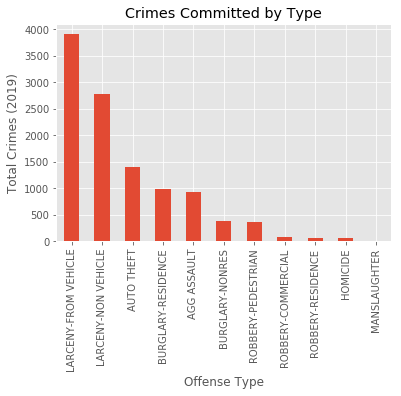

In [419]:
df['UCR Literal'].value_counts().plot(kind='bar')
plt.title('Crimes Committed by Type')
plt.xlabel('Offense Type')
plt.ylabel('Total Crimes (2019)')
plt.show()

### Stats of number of incidents happening during different periods of the day

In [446]:
df["Shift Occurrence"].value_counts()

Evening Watch    3974
Day Watch        2959
Morning Watch    2606
Unknown           251
Name: Shift Occurrence, dtype: int64

### Feature Engineering of DateTime
Hour, Minute, Day of the Month, Day of the Week are extracted from DateTime feature using Pandas library. All these features can independently contribute as usefull features for our model.

In [421]:
df["DateTime"] = pd.to_datetime(df["Occur Date"].astype(str)+' '+df["Occur Time"].astype(str))

In [422]:
df['DateTime'] = pd.to_datetime(df.DateTime)

In [423]:
df['Hour'] = df.DateTime.dt.hour

In [424]:
df['Minute'] = df.DateTime.dt.minute

In [425]:
df['Month'] = df.DateTime.dt.month
#df['Year'] = df.DateTime.dt.year

In [426]:
df.head()

,Occur Date,Occur Time,Beat,Location,Shift Occurrence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude,DateTime,Hour,Minute,Month
0,2019-01-01,00:20:00,511.0,50 UPPER ALABAMA ST SW,Morning Watch,13,LARCENY-NON VEHICLE,620,2302,Downtown,M,33.75194,-84.38964,2019-01-01 00:20:00,0,20,1
1,2019-01-01,01:20:00,511.0,20 BROAD ST,Morning Watch,NaN,LARCENY-NON VEHICLE,620,2302,Downtown,M,33.75312,-84.39208,2019-01-01 01:20:00,1,20,1
2,2019-01-01,17:40:00,411.0,3000 CONTINENTAL COLONY PKWY SW,Evening Watch,26,LARCENY-NON VEHICLE,620,2302,Greenbriar,R,33.68077,-84.49370,2019-01-01 17:40:00,17,40,1
3,2019-01-01,04:15:00,607.0,1362 BOULEVARD SE,Morning Watch,23,LARCENY-NON VEHICLE,630,2303,Benteen Park,W,33.71744,-84.36818,2019-01-01 04:15:00,4,15,1
4,2019-01-01,14:00:00,210.0,3393 PEACHTREE RD NE @LENOX MALL,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212,2019-01-01 14:00:00,14,0,1


In [ ]:
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Day'] = df['DateTime'].dt.day

### Null Values
Checking the null values in our dataset

In [428]:
df.isnull().sum()

Occur Date            0
Occur Time            0
Beat                  9
Location              0
Shift Occurrence      0
Location Type       732
UCR Literal           0
UCR #                 0
IBR Code              0
Neighborhood        405
NPU                   6
Latitude              0
Longitude             0
DateTime              0
Hour                  0
Minute                0
Month                 0
dtype: int64

### Number of unique Values of each feature column
This done to know which all columns need to be one hot encoded

In [431]:
df.nunique()

Occur Date           252
Occur Time          1142
Beat                  80
Location            6584
Shift Occurrence       4
Location Type         34
UCR Literal           11
UCR #                 48
IBR Code              60
Neighborhood         228
NPU                   25
Latitude            5225
Longitude           5252
DateTime            8247
Hour                  24
Minute                60
Month                 12
DayOfWeek              7
Day                   31
dtype: int64

### As all the relevant features are already extracted in separate columns, therefore there is no need of Date time columns

In [432]:
del df['Occur Date']

In [433]:
del df['Occur Time']

### Checking the datatype of various feature columns

In [434]:
df.dtypes

Beat                       float64
Location                    object
Shift Occurrence            object
Location Type               object
UCR Literal                 object
UCR #                        int64
IBR Code                    object
Neighborhood                object
NPU                         object
Latitude                   float64
Longitude                  float64
DateTime            datetime64[ns]
Hour                         int64
Minute                       int64
Month                        int64
DayOfWeek                    int64
Day                          int64
dtype: object

In [435]:
df=df.dropna(how='any') 

In [438]:
df.head(2)

,Beat,Location,Shift Occurrence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude,DateTime,Hour,Minute,Month,DayOfWeek,Day
0,511.0,50 UPPER ALABAMA ST SW,Morning Watch,13,LARCENY-NON VEHICLE,620,2302,Downtown,M,33.75194,-84.38964,2019-01-01 00:20:00,0,20,1,1,1
2,411.0,3000 CONTINENTAL COLONY PKWY SW,Evening Watch,26,LARCENY-NON VEHICLE,620,2302,Greenbriar,R,33.68077,-84.49370,2019-01-01 17:40:00,17,40,1,1,1


### Absurd Values removal

In [439]:
df=df[df['Location Type'] != 'E']

In [440]:
df['Location Type'].unique()

array(['13', '26', '23', '8', '24', '12', '20', '18', '21', '99', '31',
       '3', '2', '14', '6', '5', '28', '4', '11', '9', '7', '29', '17',
       '1', '10', '19', '35', '36', '30', '15', '34', '33', '16'],
      dtype=object)

### Separating out label of our model

In [441]:
Y = df['UCR Literal'].values

In [442]:
Y

array(['LARCENY-NON VEHICLE', 'LARCENY-NON VEHICLE',
       'LARCENY-NON VEHICLE', ..., 'HOMICIDE', 'AGG ASSAULT',
       'BURGLARY-NONRES'], dtype=object)

In [443]:
Y = np.reshape(Y, (-1, 1))

In [444]:
Y

array([['LARCENY-NON VEHICLE'],
       ['LARCENY-NON VEHICLE'],
       ['LARCENY-NON VEHICLE'],
       ...,
       ['HOMICIDE'],
       ['AGG ASSAULT'],
       ['BURGLARY-NONRES']], dtype=object)

In [445]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### Separating out the final features of our model

In [654]:
df1 = df[['Latitude','Longitude','Shift Occurrence','Location Type','Neighborhood','Hour','Minute','Month','DayOfWeek','Day']]
# df1 = df[['Latitude','Longitude','Shift Occurrence','Hour','Minute','Month','DayOfWeek','Day']]
# df1 = df[['Latitude','Longitude']]

In [655]:
df1.head()

,Latitude,Longitude,Shift Occurrence,Location Type,Neighborhood,Hour,Minute,Month,DayOfWeek,Day
0,33.75194,-84.38964,Morning Watch,13,Downtown,0,20,1,1,1
2,33.68077,-84.49370,Evening Watch,26,Greenbriar,17,40,1,1,1
3,33.71744,-84.36818,Morning Watch,23,Benteen Park,4,15,1,1,1
4,33.84676,-84.36212,Evening Watch,8,Lenox,14,0,1,1,1
5,33.84676,-84.36212,Evening Watch,24,Lenox,15,28,1,1,1


In [656]:
df1.dtypes

Latitude            float64
Longitude           float64
Shift Occurrence     object
Location Type        object
Neighborhood         object
Hour                  int64
Minute                int64
Month                 int64
DayOfWeek             int64
Day                   int64
dtype: object

### One Hot encoding
All the categorical data is one hot encoded.

In [657]:
df1=pd.get_dummies(df1)

In [658]:
df1.shape

(9790, 270)

In [659]:
X = df1.values

### Scaling the features
Using Standard Scaler for scaling all the features

In [660]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [661]:
X=scaler.transform(X)

### Label Encoding and One Hot Encoding of the Label column

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit(Y)
labels = integer_encoded.classes_
integer_encoded = integer_encoded.transform(Y)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [663]:
onehot_encoded[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [664]:
Y=onehot_encoded

In [665]:
Y.shape

(9790, 11)

### Train Test Split

In [666]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

print("Training Data Size: " + str(X_train.shape))
print("Testing Data Size:" + str(X_test.shape))
print("Training Label Size: " + str(Y_train.shape))
print("Testing Label Size: " + str(Y_test.shape))

Training Data Size: (7832, 270)
Testing Data Size:(1958, 270)
Training Label Size: (7832, 11)
Testing Label Size: (1958, 11)


### Neural Network Model
The following model uses 6 dense layers with softmax on the output layer

In [560]:
from keras.layers import Dense, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1], ) ) )
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh') )
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh') )
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh') )
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh') )
model.add(Dropout(0.2))
model.add(Dense(128, activation='tanh') )
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh') )


model.add(Dense(Y_train.shape[1], activation='softmax') )

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 64)                17344     
_________________________________________________________________
dropout_65 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_96 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_66 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_97 (Dense)             (None, 512)               66048     
_________________________________________________________________
dropout_67 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_98 (Dense)             (None, 128)               65664     
__________

### Training

In [561]:
history = model.fit( X_train, Y_train, epochs = 1000, batch_size=128, validation_split=0.1, verbose = 1 )

Train on 7048 samples, validate on 784 samples
Epoch 1/1000
7048/7048 [==============================] - 2s 284us/step - loss: 1.8001 - acc: 0.3214 - val_loss: 1.6969 - val_acc: 0.3622
Epoch 2/1000
7048/7048 [==============================] - 0s 55us/step - loss: 1.7390 - acc: 0.3434 - val_loss: 1.7006 - val_acc: 0.3622
Epoch 3/1000
7048/7048 [==============================] - 0s 56us/step - loss: 1.7255 - acc: 0.3463 - val_loss: 1.7027 - val_acc: 0.3597
Epoch 4/1000
7048/7048 [==============================] - 0s 53us/step - loss: 1.7189 - acc: 0.3482 - val_loss: 1.6878 - val_acc: 0.3622
Epoch 5/1000
7048/7048 [==============================] - 0s 54us/step - loss: 1.6931 - acc: 0.3635 - val_loss: 1.6103 - val_acc: 0.3839
Epoch 6/1000
7048/7048 [==============================] - 0s 54us/step - loss: 1.6240 - acc: 0.4127 - val_loss: 1.4966 - val_acc: 0.4541
Epoch 7/1000
7048/7048 [==============================] - 0s 62us/step - loss: 1.5288 - acc: 0.4706 - val_loss: 1.4371 - val_acc: 

7048/7048 [==============================] - 0s 55us/step - loss: 1.2518 - acc: 0.5535 - val_loss: 1.2740 - val_acc: 0.5548
Epoch 61/1000
7048/7048 [==============================] - 0s 53us/step - loss: 1.2628 - acc: 0.5498 - val_loss: 1.2790 - val_acc: 0.5638
Epoch 62/1000
7048/7048 [==============================] - 0s 61us/step - loss: 1.2390 - acc: 0.5600 - val_loss: 1.2911 - val_acc: 0.5548
Epoch 63/1000
7048/7048 [==============================] - 0s 59us/step - loss: 1.2436 - acc: 0.5548 - val_loss: 1.2655 - val_acc: 0.5689
Epoch 64/1000
7048/7048 [==============================] - 0s 64us/step - loss: 1.2426 - acc: 0.5585 - val_loss: 1.2678 - val_acc: 0.5599
Epoch 65/1000
7048/7048 [==============================] - 0s 56us/step - loss: 1.2440 - acc: 0.5526 - val_loss: 1.2842 - val_acc: 0.5548
Epoch 66/1000
7048/7048 [==============================] - 0s 56us/step - loss: 1.2379 - acc: 0.5604 - val_loss: 1.2780 - val_acc: 0.5523
Epoch 67/1000
7048/7048 [=======================

7048/7048 [==============================] - 0s 49us/step - loss: 1.1574 - acc: 0.5895 - val_loss: 1.2717 - val_acc: 0.5714
Epoch 179/1000
7048/7048 [==============================] - 0s 49us/step - loss: 1.1581 - acc: 0.5857 - val_loss: 1.3063 - val_acc: 0.5536
Epoch 180/1000
7048/7048 [==============================] - 0s 49us/step - loss: 1.1597 - acc: 0.5816 - val_loss: 1.2848 - val_acc: 0.5778
Epoch 181/1000
7048/7048 [==============================] - 0s 49us/step - loss: 1.1718 - acc: 0.5804 - val_loss: 1.2728 - val_acc: 0.5638
Epoch 182/1000
7048/7048 [==============================] - 0s 48us/step - loss: 1.1574 - acc: 0.5839 - val_loss: 1.2751 - val_acc: 0.5651
Epoch 183/1000
7048/7048 [==============================] - 0s 47us/step - loss: 1.1623 - acc: 0.5861 - val_loss: 1.2766 - val_acc: 0.5536
Epoch 184/1000
7048/7048 [==============================] - 0s 49us/step - loss: 1.1540 - acc: 0.5820 - val_loss: 1.2639 - val_acc: 0.5497
Epoch 185/1000
7048/7048 [================

7048/7048 [==============================] - 0s 65us/step - loss: 1.1360 - acc: 0.5928 - val_loss: 1.2843 - val_acc: 0.5676
Epoch 238/1000
7048/7048 [==============================] - 0s 52us/step - loss: 1.1420 - acc: 0.5853 - val_loss: 1.2791 - val_acc: 0.5625
Epoch 239/1000
7048/7048 [==============================] - 0s 52us/step - loss: 1.1485 - acc: 0.5827 - val_loss: 1.2739 - val_acc: 0.5612
Epoch 240/1000
7048/7048 [==============================] - 0s 51us/step - loss: 1.1373 - acc: 0.5873 - val_loss: 1.2859 - val_acc: 0.5599
Epoch 241/1000
7048/7048 [==============================] - 0s 53us/step - loss: 1.1611 - acc: 0.5780 - val_loss: 1.2875 - val_acc: 0.5638
Epoch 242/1000
7048/7048 [==============================] - 0s 51us/step - loss: 1.1352 - acc: 0.5911 - val_loss: 1.2814 - val_acc: 0.5612
Epoch 243/1000
7048/7048 [==============================] - 0s 62us/step - loss: 1.1415 - acc: 0.5902 - val_loss: 1.3046 - val_acc: 0.5599
Epoch 244/1000
7048/7048 [================

7048/7048 [==============================] - 0s 49us/step - loss: 1.1052 - acc: 0.6057 - val_loss: 1.3307 - val_acc: 0.5421
Epoch 297/1000
7048/7048 [==============================] - 0s 50us/step - loss: 1.1119 - acc: 0.6002 - val_loss: 1.3212 - val_acc: 0.5612
Epoch 298/1000
7048/7048 [==============================] - 0s 49us/step - loss: 1.1084 - acc: 0.5970 - val_loss: 1.2897 - val_acc: 0.5625
Epoch 299/1000
7048/7048 [==============================] - ETA: 0s - loss: 1.1089 - acc: 0.602 - 0s 49us/step - loss: 1.1084 - acc: 0.6026 - val_loss: 1.2934 - val_acc: 0.5536
Epoch 300/1000
7048/7048 [==============================] - 0s 49us/step - loss: 1.1271 - acc: 0.5907 - val_loss: 1.3197 - val_acc: 0.5778
Epoch 301/1000
7048/7048 [==============================] - 0s 49us/step - loss: 1.1171 - acc: 0.6009 - val_loss: 1.2909 - val_acc: 0.5676
Epoch 302/1000
7048/7048 [==============================] - 0s 49us/step - loss: 1.0998 - acc: 0.6031 - val_loss: 1.3138 - val_acc: 0.5663
Epoc

Epoch 355/1000
7048/7048 [==============================] - 0s 53us/step - loss: 1.0970 - acc: 0.6068 - val_loss: 1.3096 - val_acc: 0.5599
Epoch 356/1000
7048/7048 [==============================] - 0s 58us/step - loss: 1.0913 - acc: 0.6056 - val_loss: 1.3277 - val_acc: 0.5676
Epoch 357/1000
7048/7048 [==============================] - 0s 53us/step - loss: 1.0956 - acc: 0.6105 - val_loss: 1.3147 - val_acc: 0.5663
Epoch 358/1000
7048/7048 [==============================] - 0s 56us/step - loss: 1.1023 - acc: 0.5965 - val_loss: 1.3012 - val_acc: 0.5651
Epoch 359/1000
7048/7048 [==============================] - 0s 52us/step - loss: 1.0875 - acc: 0.6070 - val_loss: 1.2906 - val_acc: 0.5676
Epoch 360/1000
7048/7048 [==============================] - 0s 53us/step - loss: 1.0900 - acc: 0.6067 - val_loss: 1.3057 - val_acc: 0.5497
Epoch 361/1000
7048/7048 [==============================] - ETA: 0s - loss: 1.1062 - acc: 0.607 - 0s 50us/step - loss: 1.1041 - acc: 0.6090 - val_loss: 1.2904 - val_a

7048/7048 [==============================] - 0s 57us/step - loss: 1.0580 - acc: 0.6223 - val_loss: 1.3031 - val_acc: 0.5599
Epoch 473/1000
7048/7048 [==============================] - 0s 54us/step - loss: 1.0677 - acc: 0.6149 - val_loss: 1.3240 - val_acc: 0.5561
Epoch 474/1000
7048/7048 [==============================] - 0s 52us/step - loss: 1.0609 - acc: 0.6154 - val_loss: 1.3094 - val_acc: 0.5599
Epoch 475/1000
7048/7048 [==============================] - 0s 58us/step - loss: 1.0925 - acc: 0.6136 - val_loss: 1.3352 - val_acc: 0.5536
Epoch 476/1000
7048/7048 [==============================] - 0s 67us/step - loss: 1.0659 - acc: 0.6134 - val_loss: 1.3232 - val_acc: 0.5523
Epoch 477/1000
7048/7048 [==============================] - 0s 63us/step - loss: 1.0462 - acc: 0.6246 - val_loss: 1.3344 - val_acc: 0.5561
Epoch 478/1000
7048/7048 [==============================] - 0s 55us/step - loss: 1.0620 - acc: 0.6196 - val_loss: 1.3325 - val_acc: 0.5561
Epoch 479/1000
7048/7048 [================

7048/7048 [==============================] - 1s 72us/step - loss: 1.0572 - acc: 0.6251 - val_loss: 1.3557 - val_acc: 0.5472
Epoch 532/1000
7048/7048 [==============================] - 0s 69us/step - loss: 1.0488 - acc: 0.6212 - val_loss: 1.3188 - val_acc: 0.5395
Epoch 533/1000
7048/7048 [==============================] - 0s 68us/step - loss: 1.0388 - acc: 0.6200 - val_loss: 1.3482 - val_acc: 0.5689
Epoch 534/1000
7048/7048 [==============================] - 0s 64us/step - loss: 1.0337 - acc: 0.6297 - val_loss: 1.3608 - val_acc: 0.5536
Epoch 535/1000
7048/7048 [==============================] - 0s 55us/step - loss: 1.0455 - acc: 0.6202 - val_loss: 1.3231 - val_acc: 0.5689
Epoch 536/1000
7048/7048 [==============================] - 0s 55us/step - loss: 1.0406 - acc: 0.6215 - val_loss: 1.3516 - val_acc: 0.5497
Epoch 537/1000
7048/7048 [==============================] - 0s 54us/step - loss: 1.0362 - acc: 0.6293 - val_loss: 1.3440 - val_acc: 0.5510
Epoch 538/1000
7048/7048 [================

7048/7048 [==============================] - 0s 54us/step - loss: 1.0226 - acc: 0.6345 - val_loss: 1.3499 - val_acc: 0.5587
Epoch 649/1000
7048/7048 [==============================] - 0s 54us/step - loss: 1.0211 - acc: 0.6322 - val_loss: 1.3237 - val_acc: 0.5599
Epoch 650/1000
7048/7048 [==============================] - 0s 53us/step - loss: 1.0424 - acc: 0.6227 - val_loss: 1.3475 - val_acc: 0.5536
Epoch 651/1000
7048/7048 [==============================] - 0s 54us/step - loss: 1.0314 - acc: 0.6232 - val_loss: 1.3356 - val_acc: 0.5523
Epoch 652/1000
7048/7048 [==============================] - 0s 57us/step - loss: 1.0162 - acc: 0.6329 - val_loss: 1.3532 - val_acc: 0.5472
Epoch 653/1000
7048/7048 [==============================] - 0s 53us/step - loss: 1.0209 - acc: 0.6361 - val_loss: 1.3571 - val_acc: 0.5574
Epoch 654/1000
7048/7048 [==============================] - 0s 53us/step - loss: 1.0235 - acc: 0.6300 - val_loss: 1.3504 - val_acc: 0.5574
Epoch 655/1000
7048/7048 [================

7048/7048 [==============================] - 0s 61us/step - loss: 1.0028 - acc: 0.6361 - val_loss: 1.3587 - val_acc: 0.5625
Epoch 708/1000
7048/7048 [==============================] - 0s 55us/step - loss: 1.0178 - acc: 0.6341 - val_loss: 1.3605 - val_acc: 0.5651
Epoch 709/1000
7048/7048 [==============================] - 0s 52us/step - loss: 1.0052 - acc: 0.6349 - val_loss: 1.3563 - val_acc: 0.5497
Epoch 710/1000
7048/7048 [==============================] - 0s 55us/step - loss: 1.0144 - acc: 0.6385 - val_loss: 1.3657 - val_acc: 0.5485
Epoch 711/1000
7048/7048 [==============================] - 0s 54us/step - loss: 1.0107 - acc: 0.6369 - val_loss: 1.3787 - val_acc: 0.5587
Epoch 712/1000
7048/7048 [==============================] - 0s 59us/step - loss: 1.0287 - acc: 0.6287 - val_loss: 1.3695 - val_acc: 0.5510
Epoch 713/1000
7048/7048 [==============================] - 0s 54us/step - loss: 1.0136 - acc: 0.6402 - val_loss: 1.3712 - val_acc: 0.5485
Epoch 714/1000
7048/7048 [================

7048/7048 [==============================] - 0s 50us/step - loss: 1.0014 - acc: 0.6405 - val_loss: 1.3766 - val_acc: 0.5383
Epoch 767/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9948 - acc: 0.6415 - val_loss: 1.3945 - val_acc: 0.5383
Epoch 768/1000
7048/7048 [==============================] - 0s 50us/step - loss: 1.0187 - acc: 0.6392 - val_loss: 1.3850 - val_acc: 0.5306
Epoch 769/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9934 - acc: 0.6415 - val_loss: 1.3969 - val_acc: 0.5344
Epoch 770/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9970 - acc: 0.6400 - val_loss: 1.3776 - val_acc: 0.5446
Epoch 771/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9881 - acc: 0.6460 - val_loss: 1.3717 - val_acc: 0.5459
Epoch 772/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9956 - acc: 0.6388 - val_loss: 1.3729 - val_acc: 0.5485
Epoch 773/1000
7048/7048 [================

7048/7048 [==============================] - 0s 50us/step - loss: 0.9749 - acc: 0.6493 - val_loss: 1.3962 - val_acc: 0.5536
Epoch 826/1000
7048/7048 [==============================] - 0s 51us/step - loss: 0.9754 - acc: 0.6507 - val_loss: 1.4057 - val_acc: 0.5421
Epoch 827/1000
7048/7048 [==============================] - 0s 51us/step - loss: 0.9809 - acc: 0.6505 - val_loss: 1.4075 - val_acc: 0.5561
Epoch 828/1000
7048/7048 [==============================] - 0s 51us/step - loss: 0.9841 - acc: 0.6478 - val_loss: 1.3876 - val_acc: 0.5459
Epoch 829/1000
7048/7048 [==============================] - 0s 51us/step - loss: 0.9938 - acc: 0.6409 - val_loss: 1.3931 - val_acc: 0.5421
Epoch 830/1000
7048/7048 [==============================] - 0s 50us/step - loss: 1.0015 - acc: 0.6432 - val_loss: 1.4243 - val_acc: 0.5446
Epoch 831/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9835 - acc: 0.6470 - val_loss: 1.4140 - val_acc: 0.5497
Epoch 832/1000
7048/7048 [================

7048/7048 [==============================] - 0s 51us/step - loss: 0.9835 - acc: 0.6510 - val_loss: 1.3991 - val_acc: 0.5306
Epoch 885/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9855 - acc: 0.6461 - val_loss: 1.3845 - val_acc: 0.5536
Epoch 886/1000
7048/7048 [==============================] - 0s 50us/step - loss: 1.0195 - acc: 0.6354 - val_loss: 1.3989 - val_acc: 0.5293
Epoch 887/1000
7048/7048 [==============================] - 0s 51us/step - loss: 0.9885 - acc: 0.6459 - val_loss: 1.3955 - val_acc: 0.5497
Epoch 888/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9722 - acc: 0.6419 - val_loss: 1.4030 - val_acc: 0.5395
Epoch 889/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9819 - acc: 0.6493 - val_loss: 1.4007 - val_acc: 0.5485
Epoch 890/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9777 - acc: 0.6459 - val_loss: 1.4001 - val_acc: 0.5408
Epoch 891/1000
7048/7048 [================

Epoch 943/1000
7048/7048 [==============================] - 0s 51us/step - loss: 0.9687 - acc: 0.6539 - val_loss: 1.3973 - val_acc: 0.5561
Epoch 944/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9639 - acc: 0.6495 - val_loss: 1.4116 - val_acc: 0.5497
Epoch 945/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9665 - acc: 0.6511 - val_loss: 1.4298 - val_acc: 0.5497
Epoch 946/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9598 - acc: 0.6512 - val_loss: 1.4237 - val_acc: 0.5344
Epoch 947/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9684 - acc: 0.6481 - val_loss: 1.4226 - val_acc: 0.5446
Epoch 948/1000
7048/7048 [==============================] - 0s 50us/step - loss: 0.9779 - acc: 0.6451 - val_loss: 1.4242 - val_acc: 0.5332
Epoch 949/1000
7048/7048 [==============================] - 0s 53us/step - loss: 0.9755 - acc: 0.6459 - val_loss: 1.4413 - val_acc: 0.5459
Epoch 950/1000
7048/7048 [=

### Test Accuracy

In [562]:
model.evaluate(X_test,Y_test)

1958/1958 [==============================] - 0s 67us/step


[1.4720978298518461, 0.5306435138200228]

In [650]:
labels

array(['AGG ASSAULT', 'AUTO THEFT', 'BURGLARY-NONRES',
       'BURGLARY-RESIDENCE', 'HOMICIDE', 'LARCENY-FROM VEHICLE',
       'LARCENY-NON VEHICLE', 'MANSLAUGHTER', 'ROBBERY-COMMERCIAL',
       'ROBBERY-PEDESTRIAN', 'ROBBERY-RESIDENCE'], dtype=object)

In [669]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

### Trying Sample Input to get the probability of each crime category
Testing our model output with sample input

In [668]:
from math import floor 

test = np.array([[-0.4121499 , 0.06029446, 0.95146566, -0.92644004, -0.28378506, -0.99773083, -0.356867 , -0.65815827, 1.20975734, -0.60228777, -0.16221292, -0.03503205, -0.0285977 , -0.07019344, -0.18794012, 2.46034837, -0.11509898, -0.0101072 , -0.01429447, -0.05059806, -0.57396909, -0.08111905, -0.04045981, -0.5 , -0.15476262, -0.21847463, -0.18382306, -0.33691584, -0.0429185 , -0.05450695, -0.09302925, -0.0202175 , -0.07236489, -0.0202175 , -0.01429447, -0.05059806, -0.0101072 , -0.05355618, -0.10209893, -0.06719131, -0.11509898, -0.2015037 , -0.0751646 , -0.21459713, -0.0798333 , -0.05636093, -0.10412256, -0.03503205, -0.0202175 , -0.0429185 , -0.0101072 , -0.05059806, -0.0202175 , -0.03353892, -0.0285977 , -0.06485029, -0.0101072 , -0.01750797, -0.06795405, -0.09898922, -0.01429447, -0.01429447, -0.02476381, -0.01750797, -0.07164824, -0.03784281, -0.0285977 , -0.0474579 , -0.0202175 , -0.0101072 , -0.01429447, -0.03646438, -0.04409682, -0.12558227, -0.03503205, -0.0452447 , -0.0952381 , -0.06795405, -0.0101072 , -0.01750797, -0.01429447, -0.0202175 , -0.0202175 , -0.0285977 , -0.022605 , -0.03646438, -0.03197647, -0.03784281, -0.06945485, -0.09076855, -0.03917304, -0.09076855, -0.03353892, -0.0101072 , -0.05450695, -0.0952381 , -0.07307466, -0.0429185 , -0.07652689, -0.0429185 , -0.05059806, -0.03646438, -0.03503205, -0.07164824, -0.0101072 , -0.0285977 , -0.11600671, -0.0101072 , -0.07377774, -0.0101072 , -0.04852699, -0.03197647, -0.0572657 , -0.08111905, -0.03197647, -0.02476381, -0.02674934, -0.06485029, -0.02476381, -0.0607519 , -0.29668091, -0.04409682, -0.01429447, -0.1031155 , -0.04409682, -0.06945485, -0.13253581, -0.0101072 , -0.0285977 , -0.10158699, -0.022605 , -0.022605 , -0.0285977 , -0.06324231, -0.01429447, -0.022605 , -0.06485029, -0.01429447, -0.03197647, -0.07447433, -0.09190561, -0.1288982 , -0.01429447, -0.02476381, -0.12175082, -0.0202175 , -0.12218211, -0.08903662, -0.0202175 , -0.0836328 , -0.04409682, -0.01429447, -0.03197647, -0.022605 , -0.04636439, -0.12766418, -0.01429447, -0.07719923, -0.12131808, -0.03197647, -0.0101072 , -0.0452447 , -0.01429447, -0.07719923, -0.03197647, -0.05059806, -0.0101072 , -0.0285977 , -0.0952381 , -0.0202175 , -0.04852699, -0.1433032 , -0.03784281, -0.15954003, -0.10854367, -0.08111905, -0.0101072 , -0.02476381, -0.08175454, -0.03503205, -0.01750797, 8.07147128, -0.01429447, -0.01750797, -0.26973904, -0.01429447, -0.03784281, -0.10902433, -0.06242305, -0.0101072 , -0.0101072 , -0.0101072 , -0.13954598, -0.0452447 , -0.0101072 , -0.03503205, -0.1031155 , -0.16744367, -0.03197647, -0.03503205, -0.0709245 , -0.05258843, -0.022605 , -0.01750797, -0.05059806, -0.05059806, -0.05160274, -0.03353892, -0.08111905, -0.09469054, -0.0202175 , -0.08547092, -0.06242305, -0.10950298, -0.04045981, -0.02674934, -0.08903662, -0.09578263, -0.03646438, -0.03646438, -0.0101072 , -0.08301131, -0.01429447, -0.03197647, -0.0202175 , -0.0572657 , -0.02674934, -0.0429185 , -0.01750797, -0.0554416 , -0.0101072 , -0.07307466, -0.07786589, -0.06870847, -0.09632419, -0.0101072 , -0.07447433, -0.02476381, -0.10055562, -0.11957238, -0.01750797, -0.0709245 , -0.030334 , -0.05450695, -0.08607515, -0.030334 , -0.08301131, -0.0866753 , -0.1444128 , -0.11186698, -0.05355618, -0.0202175 , -0.15232315, -0.05258843, -0.04957324, -0.01750797, -0.0452447 , -0.0202175 , -0.01429447, -0.01750797, -0.1000361 , -0.03503205, -0.0101072 , -0.03503205, -0.06641998, -0.030334 , -0.03784281, -0.0285977 , -0.03784281, -0.0101072 ]])
test = scaler.transform(test)
ans = model.predict(test)

for i, n in enumerate(ans[0]):
  print("Probability of " + str(labels[i]) + ": " + str(floor(n*100)) + "%")

Probability of AGG ASSAULT: 50%
Probability of AUTO THEFT: 12%
Probability of BURGLARY-NONRES: 0%
Probability of BURGLARY-RESIDENCE: 0%
Probability of HOMICIDE: 2%
Probability of LARCENY-FROM VEHICLE: 13%
Probability of LARCENY-NON VEHICLE: 4%
Probability of MANSLAUGHTER: 0%
Probability of ROBBERY-COMMERCIAL: 0%
Probability of ROBBERY-PEDESTRIAN: 15%
Probability of ROBBERY-RESIDENCE: 0%


### Random Forest Classification Model
Trying Random forest classsifier

In [563]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [714]:
df2 = df[['Latitude','Longitude','Shift Occurrence','Location Type','Neighborhood','Hour','Minute','Month','DayOfWeek','Day']]

In [715]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Shift Occurrence']=le.fit_transform(df2['Shift Occurrence']) 
df2['Neighborhood']=le.fit_transform(df2['Neighborhood']) 

C:\Users\IKNOOR\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\IKNOOR\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [716]:
df2.head(2)

,Latitude,Longitude,Shift Occurrence,Location Type,Neighborhood,Hour,Minute,Month,DayOfWeek,Day
0,33.75194,-84.38964,2,13,76,0,20,1,1,1
2,33.68077,-84.49370,1,26,100,17,40,1,1,1


In [717]:
X_train, X_test, Y_train, Y_test = train_test_split(df2, integer_encoded, test_size=0.20, random_state=42)

In [718]:
integer_encoded

array([[6],
       [6],
       [6],
       ...,
       [4],
       [0],
       [2]])

In [719]:
df2.head(3)

,Latitude,Longitude,Shift Occurrence,Location Type,Neighborhood,Hour,Minute,Month,DayOfWeek,Day
0,33.75194,-84.38964,2,13,76,0,20,1,1,1
2,33.68077,-84.49370,1,26,100,17,40,1,1,1
3,33.71744,-84.36818,2,23,28,4,15,1,1,1


In [720]:
trees = 1000
depth = 100
clf = RandomForestClassifier(n_estimators=trees, max_depth=depth)

### Training on 100 trees

In [721]:
clf.fit(X_train, Y_train)

C:\Users\IKNOOR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [722]:
Y_test

array([[5],
       [5],
       [5],
       ...,
       [6],
       [5],
       [3]])

In [723]:
peds = clf.predict(X_test)
peds

array([5, 0, 0, ..., 6, 0, 5])

### Test Accuracy

In [724]:
clf.score(X_test,Y_test)

0.5510725229826353

## Trying outher models and calculating test accuracy

### 1) Light GBM Classification Model

In [728]:
from lightgbm import LGBMClassifier
model =LGBMClassifier(objective='multiclass', num_class=39).fit(X_train.values, Y_train)

C:\Users\IKNOOR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\IKNOOR\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [729]:
clf.score(X_test,Y_test)

0.5510725229826353

### 2) Gradient Boosting Classification Model

In [617]:
# # build gradient boosting trees model
trees = 100
depth = 10
clf = GradientBoostingClassifier(n_estimators=trees, max_depth=depth)
clf.fit(X_train, Y_train)


C:\Users\IKNOOR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [618]:
clf.score(X_test,Y_test)

0.5398365679264555

### 3) K-Nearest Neighbour Classification Model

In [670]:
df3 = df[['Beat','NPU','UCR #','IBR Code','Latitude','Longitude','Shift Occurrence','Location Type','Neighborhood','Hour','Minute','Month','DayOfWeek','Day']]

In [671]:
df3.head(1)

,Latitude,Longitude,Shift Occurrence,Neighborhood,Hour,DayOfWeek,Day
0,33.75194,-84.38964,Morning Watch,Downtown,0,1,1


In [672]:
df3=pd.get_dummies(df3)

In [673]:
df3.head(1)

,Latitude,Longitude,Hour,DayOfWeek,Day,Shift Occurrence_Day Watch,Shift Occurrence_Evening Watch,Shift Occurrence_Morning Watch,Shift Occurrence_Unknown,Neighborhood_Adair Park,...,Neighborhood_Westview,Neighborhood_Westwood Terrace,Neighborhood_Whitewater Creek,Neighborhood_Whittier Mill Village,Neighborhood_Wildwood (NPU-C),Neighborhood_Wildwood (NPU-H),Neighborhood_Wilson Mill Meadows,Neighborhood_Wisteria Gardens,Neighborhood_Woodland Hills,Neighborhood_Wyngate
0,33.75194,-84.38964,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [674]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
scaler.fit(df3)

C:\Users\IKNOOR\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [675]:
df3=scaler.transform(df3)

C:\Users\IKNOOR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [676]:
df3

array([[-0.21172121,  0.2868266 , -2.00717897, ..., -0.0285977 ,
        -0.03784281, -0.0101072 ],
       [-1.78617048, -2.05873898,  0.50766897, ..., -0.0285977 ,
        -0.03784281, -0.0101072 ],
       [-0.97494307,  0.77054597, -1.41545005, ..., -0.0285977 ,
        -0.03784281, -0.0101072 ],
       ...,
       [ 0.91165288, -0.9258529 ,  0.2118045 , ..., -0.0285977 ,
        -0.03784281, -0.0101072 ],
       [-1.61472209, -3.01152638, -1.41545005, ..., -0.0285977 ,
        -0.03784281, -0.0101072 ],
       [ 0.77051214,  0.73944006, -1.71131451, ..., -0.0285977 ,
        -0.03784281, -0.0101072 ]])

In [677]:
X_train, X_test, Y_train, Y_test = train_test_split(df3, integer_encoded, test_size=0.20, random_state=42)

In [678]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Trying different values of of n_neighbors

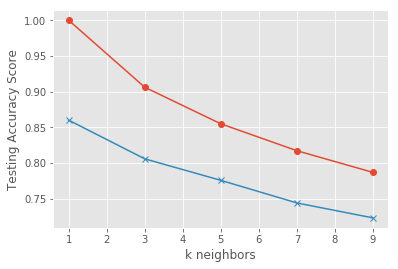

In [649]:
train_scores = []
test_scores = []
for k in range(1, 10, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_score = knn.score(X_train, Y_train)
    test_score = knn.score(X_test, Y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
plt.plot(range(1, 10, 2), train_scores, marker='o')
plt.plot(range(1, 10, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()